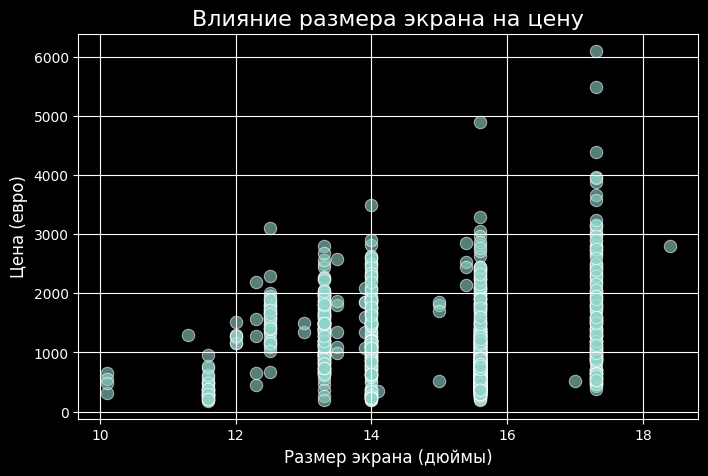

C:\Users\temcf\AppData\Local\Temp\ipykernel_17512\2288122673.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Ram', y='Price_euros', data=df, jitter=True, palette='Set2', alpha=0.6)


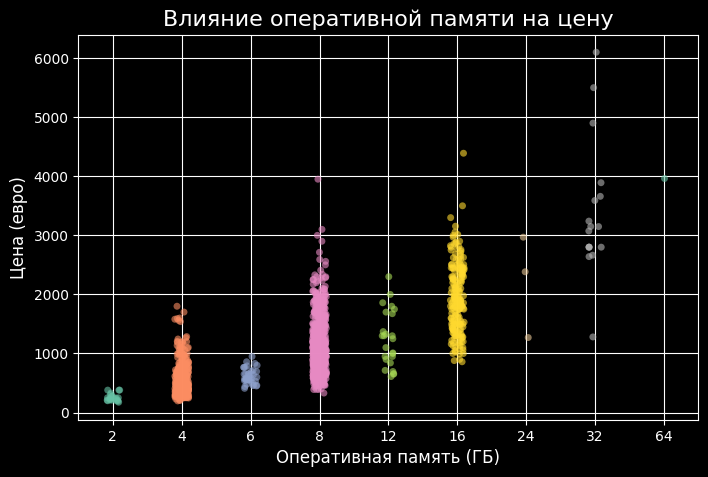

C:\Users\temcf\AppData\Local\Temp\ipykernel_17512\2288122673.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TypeName', y='Price_euros', data=df, palette=palette)
C:\Users\temcf\AppData\Local\Temp\ipykernel_17512\2288122673.py:60: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.boxplot(x='TypeName', y='Price_euros', data=df, palette=palette)


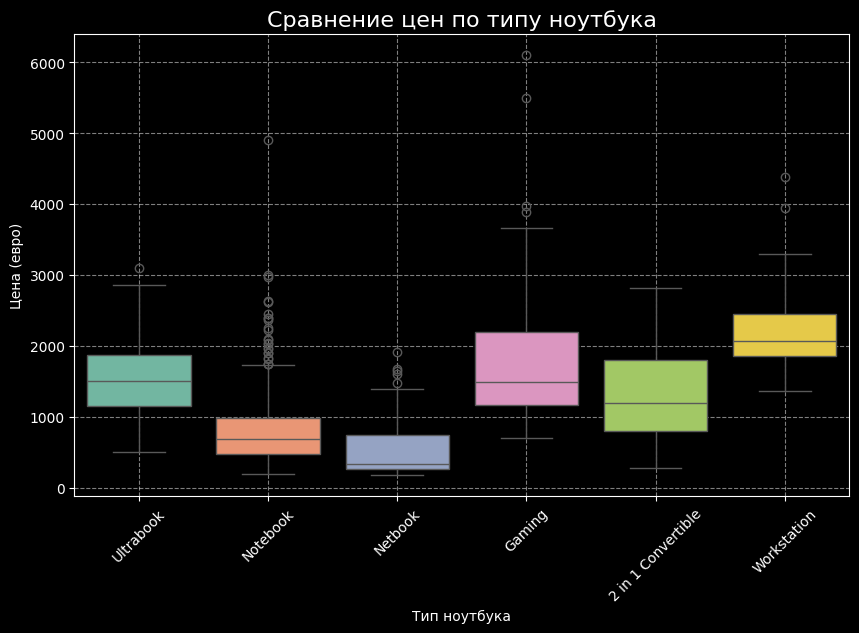

C:\Users\temcf\AppData\Local\Temp\ipykernel_17512\2288122673.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Price_euros', data=df, palette=palette)
C:\Users\temcf\AppData\Local\Temp\ipykernel_17512\2288122673.py:70: UserWarning: 
The palette list has fewer values (8) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Company', y='Price_euros', data=df, palette=palette)


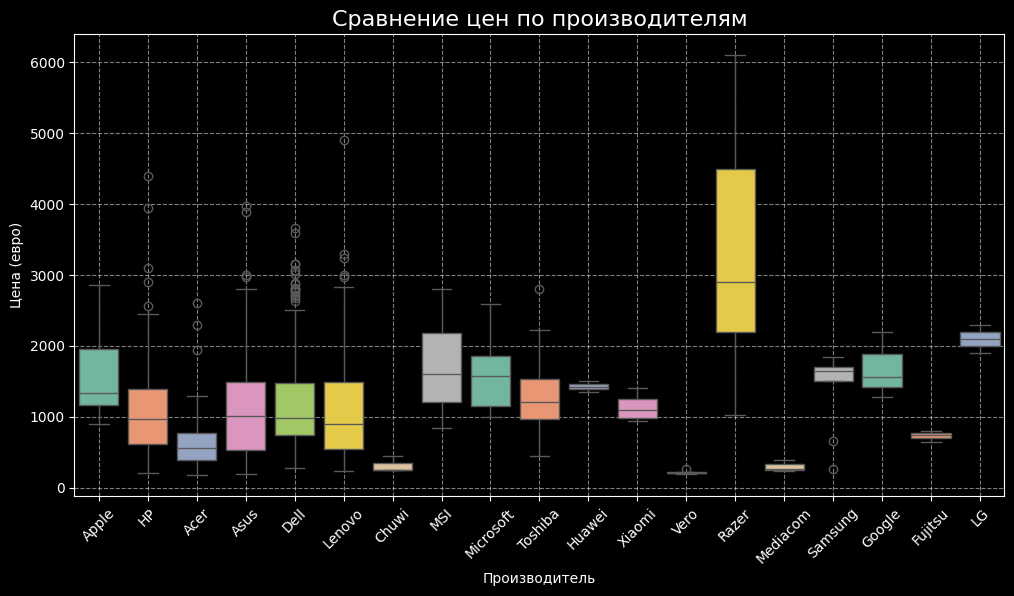

C:\Users\temcf\AppData\Local\Temp\ipykernel_17512\2288122673.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OpSys', y='Price_euros', data=df, palette=palette)
C:\Users\temcf\AppData\Local\Temp\ipykernel_17512\2288122673.py:80: UserWarning: 
The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='OpSys', y='Price_euros', data=df, palette=palette)


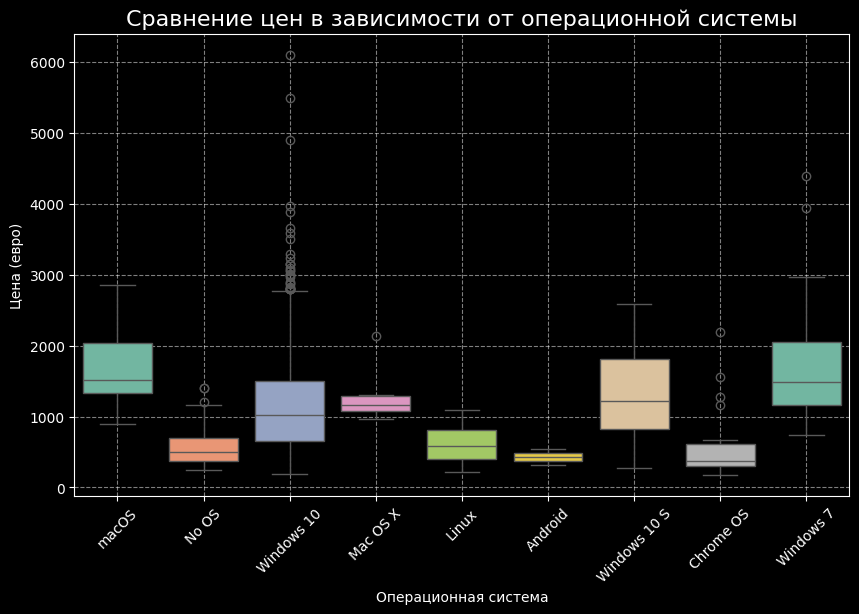

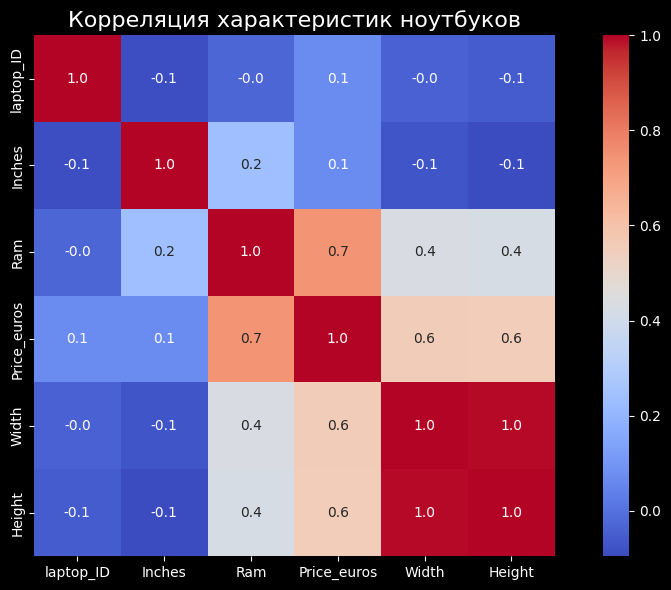

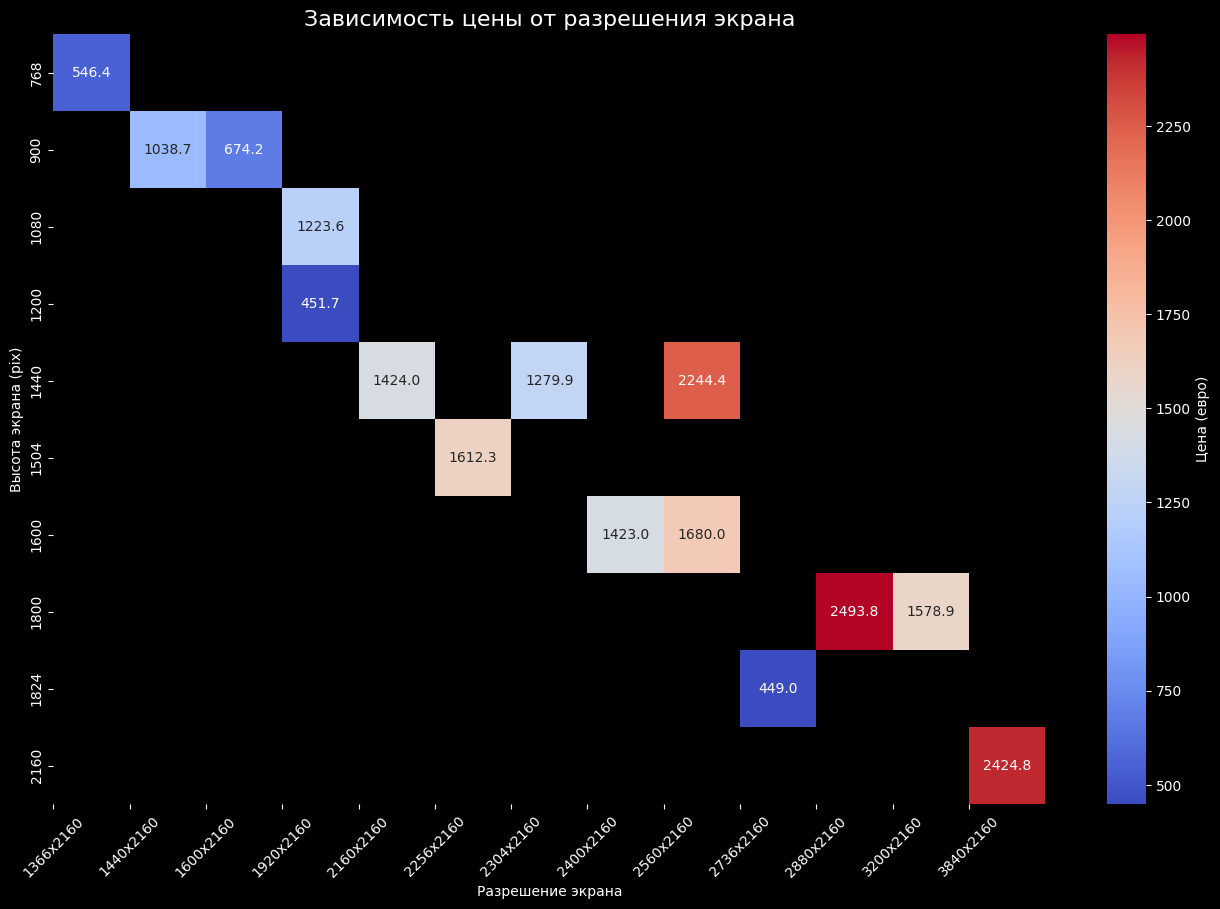

In [1]:
# Импорт всех небходимых библиотек и модулей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Загрузка данных из CSV-файла с указанием кодировки
df = pd.read_csv('laptop_price.csv', sep=',', encoding='latin-1')

# Преобразование значений RAM в числовой формат
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# Функция для извлечения ширины и высоты экрана из строки
def extract_resolution(resolution_string):
    if isinstance(resolution_string, str):
        # Использую регулярные выражения для нахождения значений ширины и высоты
        match = re.search(r'(\d+)\s*[x*]\s*(\d+)', resolution_string)
        if match:
            # Извлекаю ширину и высоту
            width, height = int(match.group(1)), int(match.group(2))
            return pd.Series([width, height])
    return pd.Series([None, None])
    
# Применяю функцию извлечения разрешения к столбцу 'ScreenResolution'
df[['Width', 'Height']] = df['ScreenResolution'].apply(extract_resolution)

# Преобразую столбцы ширины и высоты в числовой формат
df['Width'] = pd.to_numeric(df['Width'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

# Преобразую цену в float и округляем
df['Price_euros'] = df['Price_euros'].astype(float).round(1)

# Устанавливаю стиль фонового оформления графиков
plt.style.use('dark_background')
# Задаем палитру цветов для графиков
palette = sns.color_palette('Set2')

# Создаю график рассеяния для анализа зависимости цены от размера экрана
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Inches', y='Price_euros', data=df, alpha=0.6, s=80)
plt.title('Влияние размера экрана на цену', fontsize=16)
plt.xlabel('Размер экрана (дюймы)', fontsize=12)
plt.ylabel('Цена (евро)', fontsize=12)
plt.grid(True)
plt.show()

# Создаю график для зависимости цены от оперативной памяти
plt.figure(figsize=(8, 5))
sns.stripplot(x='Ram', y='Price_euros', data=df, jitter=True, palette='Set2', alpha=0.6)
plt.title('Влияние оперативной памяти на цену', fontsize=16)
plt.xlabel('Оперативная память (ГБ)', fontsize=12)
plt.ylabel('Цена (евро)', fontsize=12)
plt.grid(True)
plt.show()

# Создаю box plot для сравнения цен по типу ноутбука
plt.figure(figsize=(10, 6))
sns.boxplot(x='TypeName', y='Price_euros', data=df, palette=palette)
plt.title('Сравнение цен по типу ноутбука', fontsize=16)
plt.xlabel('Тип ноутбука')
plt.ylabel('Цена (евро)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Создаю box plot для сравнения цен по производителям
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price_euros', data=df, palette=palette)
plt.title('Сравнение цен по производителям', fontsize=16)
plt.xlabel('Производитель')
plt.ylabel('Цена (евро)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Создаю box plot для зависимости цены от операционной системы
plt.figure(figsize=(10, 6))
sns.boxplot(x='OpSys', y='Price_euros', data=df, palette=palette)
plt.title('Сравнение цен в зависимости от операционной системы', fontsize=16)
plt.xlabel('Операционная система')
plt.ylabel('Цена (евро)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Рассчитываю корреляционную матрицу для всех числовых переменных
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Визуализирую корреляционную матрицу с помощью тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, annot=True, fmt=".1f", square=True)
plt.title('Корреляция характеристик ноутбуков', fontsize=16)
plt.tight_layout()
plt.show()

# Применяю функцию извлечения разрешения к столбцу 'ScreenResolution'
# Создаю новый столбец 'Resolution', который содержит строковое представление разрешения
df[['Width', 'Height']] = df['ScreenResolution'].apply(extract_resolution)
df['Resolution'] = df['Width'].astype(str) + 'x' + df['Height'].astype(str)

# Рассчитываем среднюю цену по каждому разрешению и создаем сводную таблицу
avg_price_by_resolution = df.groupby('Resolution')['Price_euros'].mean().reset_index()

# Извлекаем ширину и высоту из разрешения и сохраняем в отдельные столбц
avg_price_by_resolution[['Width', 'Height']] = avg_price_by_resolution['Resolution'].str.split('x', expand=True)

# Преобразуем ширину и высоту в числовой формат
avg_price_by_resolution['Width'] = pd.to_numeric(avg_price_by_resolution['Width'])
avg_price_by_resolution['Height'] = pd.to_numeric(avg_price_by_resolution['Height'])
# Создаем сводную таблицу для визуализации
avg_price_pivot = avg_price_by_resolution.pivot(index='Height', columns='Width', values='Price_euros')

# Создаем график тепловой карты для визуализации средней цены в зависимости от разрешения
plt.figure(figsize=(16, 10))
sns.heatmap(avg_price_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Цена (евро)'})
plt.title('Зависимость цены от разрешения экрана', fontsize=16)
plt.ylabel('Высота экрана (pix)')
plt.xlabel('Разрешение экрана')

# Создание меток для оси X в формате 'Width x Height'
resolution_labels = [f"{width}x{height}" for width, height in zip(avg_price_pivot.columns,
                    [avg_price_pivot.index[-1]]*len(avg_price_pivot.columns))]
plt.xticks(ticks=np.arange(len(avg_price_pivot.columns)),  
                    labels=resolution_labels, rotation=45)
plt.show()